## 1. Interpretation and significance

Suppose that we would like to know how much families in the US are spending on recreation annually. We've estimated the following model:

𝑒𝑥𝑝𝑒𝑛𝑑𝑖𝑡𝑢𝑟𝑒 = 873 + 0.0012𝑎𝑛𝑛𝑢𝑎𝑙_𝑖𝑛𝑐𝑜𝑚𝑒 + 0.00002𝑎𝑛𝑛𝑢𝑎𝑙_𝑖𝑛𝑐𝑜𝑚𝑒2 − 223.57ℎ𝑎𝑣𝑒_𝑘𝑖𝑑𝑠

where expenditure is the annual spending on recreation in US dollars, annual_income is the annual income in US dollars, and have_kids is a dummy variable indicating the families with children. Interpret the estimated coefficients. What additional statistics should be given in order to make sure that your interpretations make sense statistically. Write up your answer.

### Solution:
The first thing I notice that we are missing is the statistical significance of the coefficients. Either t statistics or associated p-values should be provided. Even though the coefficients are not exactly zero, if they are statistically insignificant, they should be considered to be zero.

If we assume that all of the coefficients are statistically significant, we can interpret the model as follows:

- The bias term is 873, but it can be difficult to interpret
- Families with children spend on average \$223.57 less than families with no children 
- The relationship between recreation expenditure and income is quadratic
- An increase of \\$1000 in annual income not only increases the recreation expenditure by $1.2 but also by an additional 2\% of the annual income (exact value depends on level of income)
- Since the relationship is quadratic, the magnitude of the second term increases as the level of X increases.

See below graph below for the relationship between annual recreation expenditure and annual income for families with kids and without kids

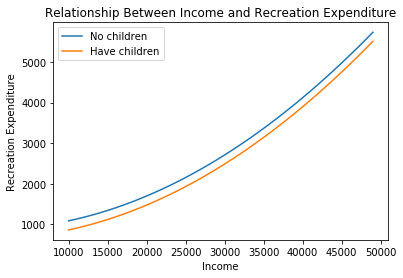

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# X represents annual income
X = np.arange(10000, 50000, 1000)

# Y represents annual expenditure on recreation for families with no children
Y = 873 + 0.0012*X + 0.000002*(X**2)

# Y_kids represents annual expenditure on recreation for families with children
Y_kids = (873 - 223.57) + 0.0012*X + 0.000002*(X**2)


plt1 = plt.plot(X, Y, label="No children")
plt2 = plt.plot(X, Y_kids, label="Have children")
plt.xlabel("Income")
plt.ylabel("Recreation Expenditure")
plt.title("Relationship Between Income and Recreation Expenditure")
plt.legend()
plt.show()

## 2. Weather model
In this exercise, you'll work with the historical temperature data from the previous checkpoint. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

- First, load the dataset from the weatherinszeged table from Thinkful's database.
- Build a linear regression model where your target variable is the difference between the apparenttemperature and the temperature. As explanatory variables, use humidity and windspeed. Now, estimate your model using OLS. Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables?
- Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS. Are the coefficients statistically significant? Did the signs of the estimated coefficients for humidity and windspeed change? Interpret the estimated coefficients.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn import linear_model
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [4]:
# Y is the target variable
Y = weather_df['apparenttemperature'] - weather_df['temperature']
# X is the feature set
X = weather_df[['humidity','windspeed']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Thu, 01 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:34:06   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.000       2.397       2.479
humidity      -3.0292      0.024   -126.479      0.000      -3.076      -2.982
windspeed     -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables?

- All estimated coefficients are statistically significant because their p-values are less than 0.05
- As humidity increases the difference between the apparent temperature and the temperature also increases, but our estimations say the sign of the coefficient of humidity is negative. Our estimation also says that the difference of the apparent tempereture and the temperature are negatively related with the wind speed
- The model indicates that a 1 point increase in the humidity results in 3.03 points decrease in the target. A 1 point increase in the windspeed is associated with 0.12 point decrease in our target variable

#### Model with the interaction of humidity and windspeed included

In [5]:
weather_df['humidity_windspeed_interaction'] = weather_df.humidity * weather_df.windspeed

# Y is the target variable
Y = weather_df['apparenttemperature'] - weather_df['temperature']
# X is the feature set
X = weather_df[['humidity','windspeed', 'humidity_windspeed_interaction']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Mon, 05 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:03:01   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0839      0.033      2.511      0.012       0.018       0.149
humidity                           0.1775      0.043      4.133      0.000       0.093       0.262
windspeed                          0.0905      0.002     36.797      0.000       0.086       0.095
humidity_windspeed_interaction    -0.2971      0.003    -88.470      0.000      -0.304      -0.291
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                          -0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Are the coefficients statistically significant? Did the signs of the estimated coefficients for humidity and windspeed change? Interpret the estimated coefficients.

- All of the estimated coefficients are statistically significant because their p-values are less than 0.05.
- The signs of the both humidity and windspeed changed from negative to the positive when the intereaction term is included
- The model indicates that a 1 point increase in the humidity and windspeed results in 0.18 and 0.09 point increases, respectively, in the target variable
- The coefficient of the interaction term is -0.30. Given some windspeed level, a 1 point increase in humidity results in 0.18 - 0.30 X windspeed point increase in the target, meaning that the target increases less for high values of windspeed than for low values of windspeed. Therefore the windspeed lessens the effects of humidity increase on the target. 
- For a given humidity level, a 1 point increase in the windspeed results in 0.09 - 0.30 X humidity point increase in the target, meaning that the humidity also lessens the effects of windspeed on the target

## 3. House prices model
In this exercise, you'll interpret your house prices model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

- Load the houseprices data from Thinkful's database.
- Run your house prices model again and interpret the results. Which features are statistically significant, and which are not?
- Now, exclude the insignificant features from your model. Did anything change?
- Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which features have a more prominent effect on house prices?
- Do the results sound reasonable to you? If not, try to explain the potential reasons.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [9]:
house_df = pd.concat([house_df,pd.get_dummies(house_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
house_df = pd.concat([house_df,pd.get_dummies(house_df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(house_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(house_df.street, prefix="street", drop_first=True).columns)

In [10]:
X = house_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'firstflrsf'] + dummy_column_names]
Y = house_df.saleprice

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     438.6
Date:                Mon, 05 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:14:38   Log-Likelihood:                -17474.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1448   BIC:                         3.504e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.189e+05   1.81e+04     -6.579      0.000   -1.54e+05   -8.35e+04
overallqual  2.352e+04   1097.295     21.435      0.000    2.14e+04    2.57e+04
grlivarea      44.2811      2.655     16.676      0.000      39.072      49.490
garagecars   1.348e+04   2989.636      4.511      0.000    7620.477    1.93e+04
garagearea     15.3485     10.427      1.472      0.141      -5.106      35.803
totalbsmtsf    24.1179      4.263      5.658      0.000      15.756      32.480
firstflrsf      6.9558      5.052      1.377      0.169      -2.953      16.865
mszoning_FV  2.501e+04   1.37e+04      1.828      0.068   -1833.870    5.18e+04
mszoning_RH  1.251e+04   1.59e+04      0.789      0.430   -1.86e+04    4.36e+04
mszoning_RL  2.748e+04   1.27e+04      2.157      0.031    2486.925    5.25e+04
mszoning_RM  8448.3602   1.29e+04      0.655      0.512   -1.68e+04    3.37e+04
street_Pave   448.6972   1.63e+04      0.028      0.978   -3.15e+04    3.24e+04
==============================================================================
Omnibus:                      413.945   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40487.648
Skew:                          -0.106   Prob(JB):                         0.00
Kurtosis:                      28.797   Cond. No.                     6.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The statistically significant variables are overallqual, grlivarea, garagecars, totalbsmtsf, mszoning_FV and mszoning_RL. All the other variables are statistically insignificant and hence their coefficients are statistically zero. According to the estimation results:

- A 1 point increase in overallqual results in a \$23330 increase in sale price.
- A 1 point increase in grlivarea results in a \$45.6344 increase in sale price.
- A 1 point increase in garagecars results in a \$13450 increase in sale price.
- A 1 point increase in totalbsmtsf results in a \$28.3816 increase in sale price.

Average sale price is higher in mszoning_FV and mszoning_RL than the base zone by \\$25090 and \$28570 respectively. Thus the average house price is the highest in mszoning_RL.

#### Now we will exclude statistically insignificant variables from the model and re-estimate it

In [11]:
X = house_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'mszoning_FV', 'mszoning_RL']]
Y = house_df.saleprice

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     689.5
Date:                Mon, 05 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:21:23   Log-Likelihood:                -17475.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1452   BIC:                         3.501e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.085e+05   4791.089    -22.653      0.000   -1.18e+05   -9.91e+04
overallqual  2.341e+04   1079.265     21.690      0.000    2.13e+04    2.55e+04
grlivarea      45.6643      2.459     18.569      0.000      40.841      50.488
garagecars   1.347e+04   2983.458      4.513      0.000    7613.379    1.93e+04
garagearea     15.9352     10.345      1.540      0.124      -4.358      36.229
totalbsmtsf    28.3424      2.927      9.682      0.000      22.600      34.085
mszoning_FV  1.607e+04   5577.883      2.882      0.004    5131.939     2.7e+04
mszoning_RL   1.96e+04   2832.590      6.919      0.000     1.4e+04    2.52e+04
==============================================================================
Omnibus:                      415.658   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41074.355
Skew:                          -0.117   Prob(JB):                         0.00
Kurtosis:                      28.983   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Yes, the results look reasonable as they resemble the original model's results. The estimated coefficients are close to the previous model with the exclusion of the dummy variables. We see that the coefficients of the dummy variables changed more in relation to the changes of the other variables.

The features that have the most prominent effect on house prices are the **overallqual** and the **mszoning**.